<a href="https://colab.research.google.com/github/ikonthomas/Cape_Town_AirBnB_Pricing_Model/blob/master/CapeTownAirBnB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import random
random.seed(42)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

listings = pd.read_csv("http://data.insideairbnb.com/south-africa/wc/cape-town/2019-04-18/data/listings.csv.gz", compression="gzip", low_memory=False)
listings.columns

#http://data.insideairbnb.com/south-africa/wc/cape-town/2019-04-18/data/listings.csv.gz

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [0]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3191,https://www.airbnb.com/rooms/3191,20190418124805,2019-04-18,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...",Beautiful self catering luxury cottage in cent...,"This is a lovely, separate, self-catering cott...",none,"Mowbray is on the Southern Suburbs line, 6km (...","There are pets on the property. One cat, who w...",The train station is about 400m from the cotta...,Fully self-contained cottage with separate ent...,"I live in the main house on the property, and ...","There is no smoking in the cottage, but you ca...",NaN,NaN,https://a0.muscache.com/im/pictures/697022/385...,NaN,3754,https://www.airbnb.com/users/show/3754,Brigitte,2008-10-21,"Cape Town, Western Cape, South Africa",I'm single and love to travel and meeting peop...,within an hour,100%,NaN,t,https://a0.muscache.com/im/users/3754/profile_...,https://a0.muscache.com/im/users/3754/profile_...,NaN,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Southern Suburbs, Western Cape, South Africa",NaN,Ward 57,...,$0.00,3,730,3,3,730,730,3.0,730.0,today,t,12,19,49,324,2019-04-18,46,7,2013-05-31,2019-03-10,97.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,NaN,t,f,moderate,f,f,1,1,0,0,0.64
1,13044,https://www.airbnb.com/rooms/13044,20190418124805,2019-04-18,JAMBO Guest House / Green Room,The Green Room at Jambo Guest House is a sligh...,"Jambo, which means hello in Swahili, is a gues...",The Green Room at Jambo Guest House is a sligh...,none,Green Point is a popular leisure district domi...,Very centrally situated and walking distance t...,A lot of big attractions are within walking di...,Guests will have access to their own private r...,Barry and Mina will be around to ensure you ha...,We expect our guests to be well behaved. Only ...,NaN,NaN,https://a0.muscache.com/im/pictures/1a1dd4ee-4...,NaN,50700,https://www.airbnb.com/users/show/50700,Barry & Mina,2009-11-02,"Cape Town, Western Cape, South Africa",We have been running multi Award Winning Jambo...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/50700/profile...,https://a0.muscache.com/im/users/50700/profile...,NaN,5.0,5.0,"['email', 'phone', 'reviews', 'selfie']",t,f,"Cape Town, Western Cape, South Africa",NaN,Ward 115,...,$0.00,3,30,1,3,30,30,1.1,30.0,today,t,0,0,0,0,2019-04-18,2,0,2011-10-24,2016-02-06,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,5,0,5,0,0.02
2,15007,https://www.airbnb.com/rooms/15007,20190418124805,2019-04-18,Blaauwberg House,Welcome to our self-catering beach-front famil...,The house sleeps 8 and has all necessa

In [0]:
useless = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'city', 'state', 'market', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'weekly_price', 'monthly_price']
listings.drop(useless, axis=1, inplace=True)

In [0]:
listings.drop(listings.filter(regex = 'review').columns, axis = 1, inplace = True)
listings.columns

Index(['host_total_listings_count', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'zipcode',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'requires_license', 'license', 'jurisdiction_names', 'instant_bookable',
       'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_li

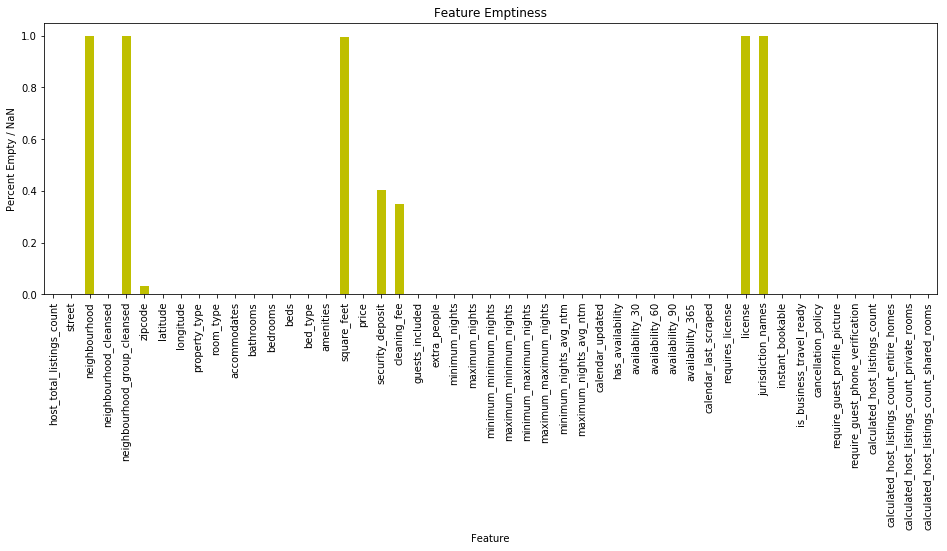

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

percentage_missing_data = listings.isnull().sum() / listings.shape[0]
ax = percentage_missing_data.plot(kind = 'bar', color='y', figsize = (16, 5))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent Empty / NaN')
ax.set_title('Feature Emptiness')
plt.show()

In [0]:
useless = ['neighbourhood', 'neighbourhood_group_cleansed', 'square_feet', 'security_deposit', 'cleaning_fee', 
           'has_availability', 'license', 'jurisdiction_names']
listings.drop(useless, axis=1, inplace=True)

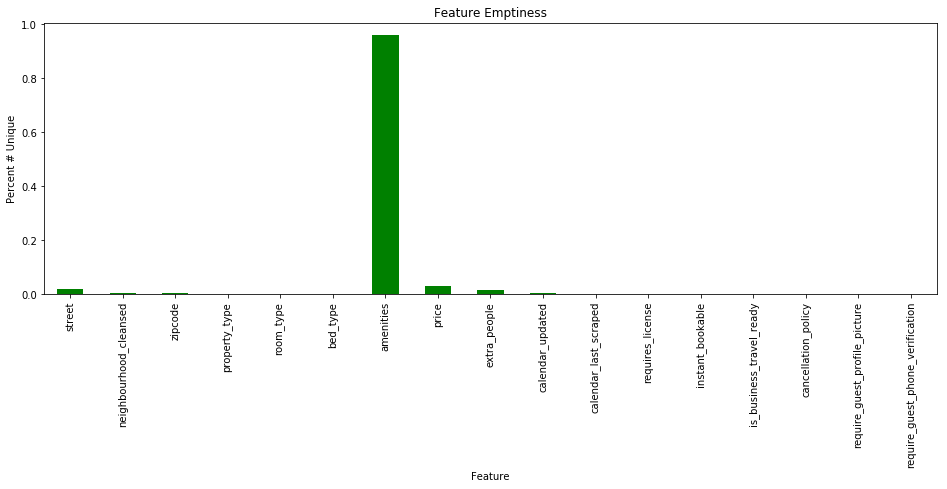

In [0]:
categories = listings.columns[listings.dtypes == 'object']
percentage_unique = listings[categories].nunique() / listings.shape[0]

ax = percentage_unique.plot(kind = 'bar', color='g', figsize = (16, 5))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent # Unique')
ax.set_title('Feature Emptiness')
plt.show()

In [0]:
to_drop = ['amenities']
listings.drop(to_drop, axis=1, inplace=True)

In [0]:
print("Number of Zipcodes:", listings['zipcode'].nunique())

Number of Zipcodes: 141


In [0]:
listings['zipcode'] = listings['zipcode'].str.slice(0,4)
listings['zipcode'] = listings['zipcode'].fillna("OTHER")
print("Number of Zipcodes:", listings['zipcode'].nunique())

Number of Zipcodes: 140


In [0]:
listings.head()

,host_total_listings_count,street,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,1.0,"Southern Suburbs, Western Cape, South Africa",Ward 57,7700,-33.94739,18.47600,Guesthouse,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$657.00,2,$0.00,3,730,3,3,730,730,3.0,730.0,today,12,19,49,324,2019-04-18,f,t,f,moderate,f,f,1,1,0,0
1,5.0,"Cape Town, Western Cape, South Africa",Ward 115,8051,-33.90771,18.40535,Bed and breakfast,Private room,2,1.0,1.0,1.0,Real Bed,"$1,301.00",2,$0.00,3,30,1,3,30,30,1.1,30.0,today,0,0,0,0,2019-04-18,f,t,f,strict_14_with_grace_period,f,f,5,0,5,0
2,18.0,"Cape Town, Western Cape, South Africa",Ward 23,7441,-33.80114,18.46180,House,Entire home/apt,6,3.0,3.0,4.0,Real Bed,"$2,042.00",6,$250.00,2,120,2,2,120,120,2.0,120.0,today,30,60,90,336,2019-04-18,f,f,f,strict_14_with_grace_period,f,f,4,4,0,0
3,15.0,"Cape Town, Western Cape, South Africa",Ward 23,7441,-33.78799,18.46082,Apartment,Entire home/apt,6,2.0,3.0,5.0,Real Bed,"$2,797.00",1,$0.00,4,730,4,4,730,730,4.0,730.0,3 months ago,29,59,89,364,2019-04-18,f,f,f,strict_14_with_grace_period,f,f,13,13,0,0
4,5.0,"Cape Town, Western Cape, South Africa",Ward 4,7441,-33.85878,18.48970,Bed and breakfast,Entire home/apt,2,1.0,1.0,2.0,Real Bed,"$1,343.00",2,$0.00,6,1125,6,6,1125,1125,6.0,1125.0,3 weeks ago,12,42,72,347,2019-04-18,f,f,f,strict_14_with_grace_period,f,f,5,4,1,0


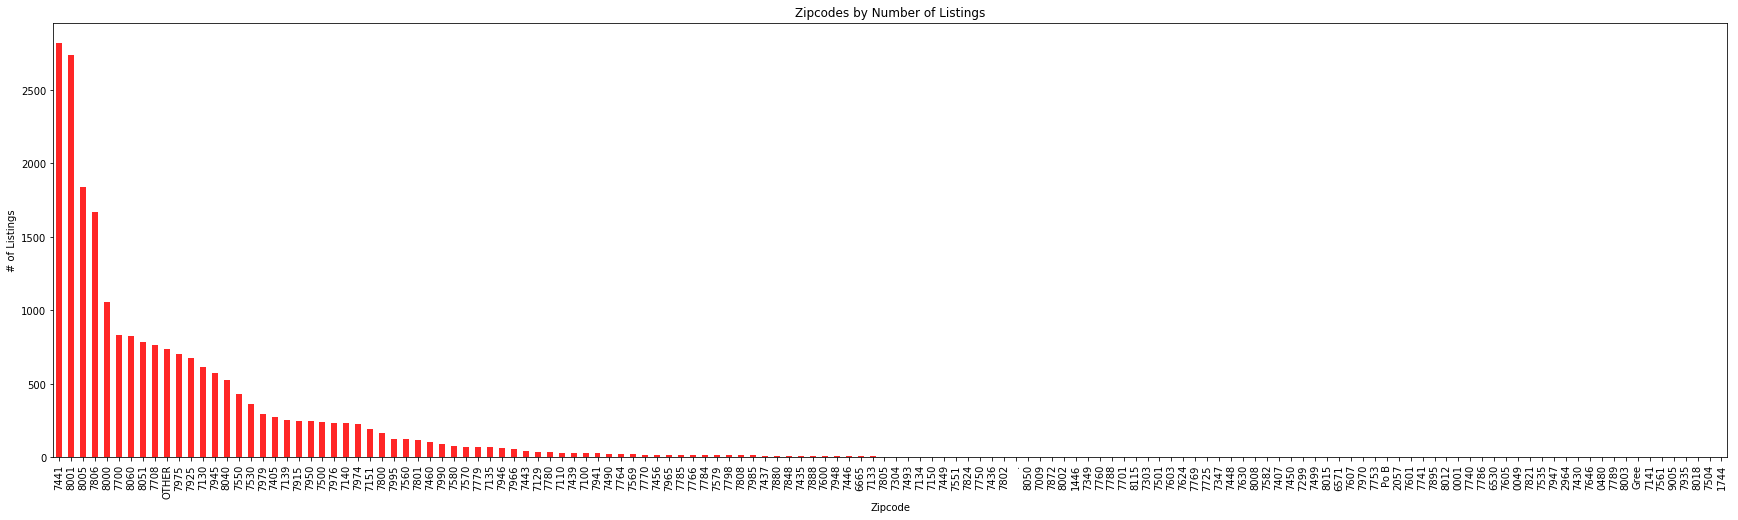

In [0]:
count_per_zipcode = listings['zipcode'].value_counts()
ax = count_per_zipcode.plot(kind='bar', figsize = (30,8), color = 'r', alpha = 0.85)
ax.set_title("Zipcodes by Number of Listings")
ax.set_xlabel("Zipcode")
ax.set_ylabel("# of Listings")
plt.show()

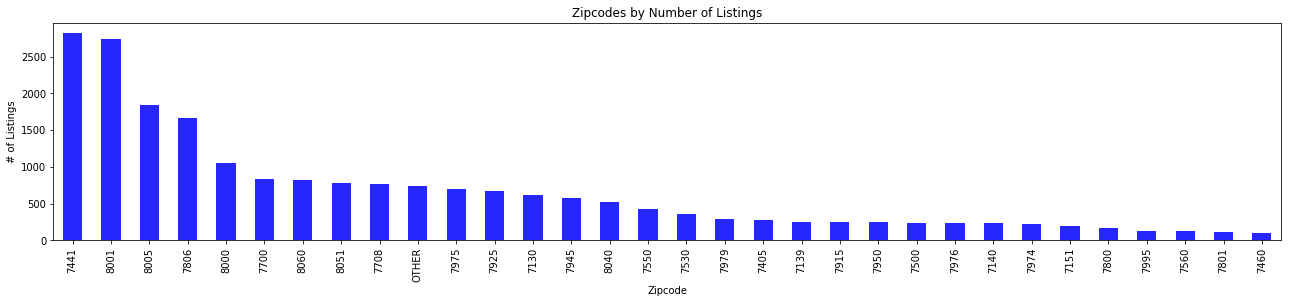

Number of entries removed:  1221


In [0]:
relevant_zipcodes = count_per_zipcode[count_per_zipcode > 100].index
listings_zip_filtered = listings[listings['zipcode'].isin(relevant_zipcodes)]

# Plot new zipcodes distribution
count_per_zipcode = listings_zip_filtered['zipcode'].value_counts()
ax = count_per_zipcode.plot(kind='bar', figsize = (22,4), color = 'b', alpha = 0.85)
ax.set_title("Zipcodes by Number of Listings")
ax.set_xlabel("Zipcode")
ax.set_ylabel("# of Listings")

plt.show()

print('Number of entries removed: ', listings.shape[0] - listings_zip_filtered.shape[0])

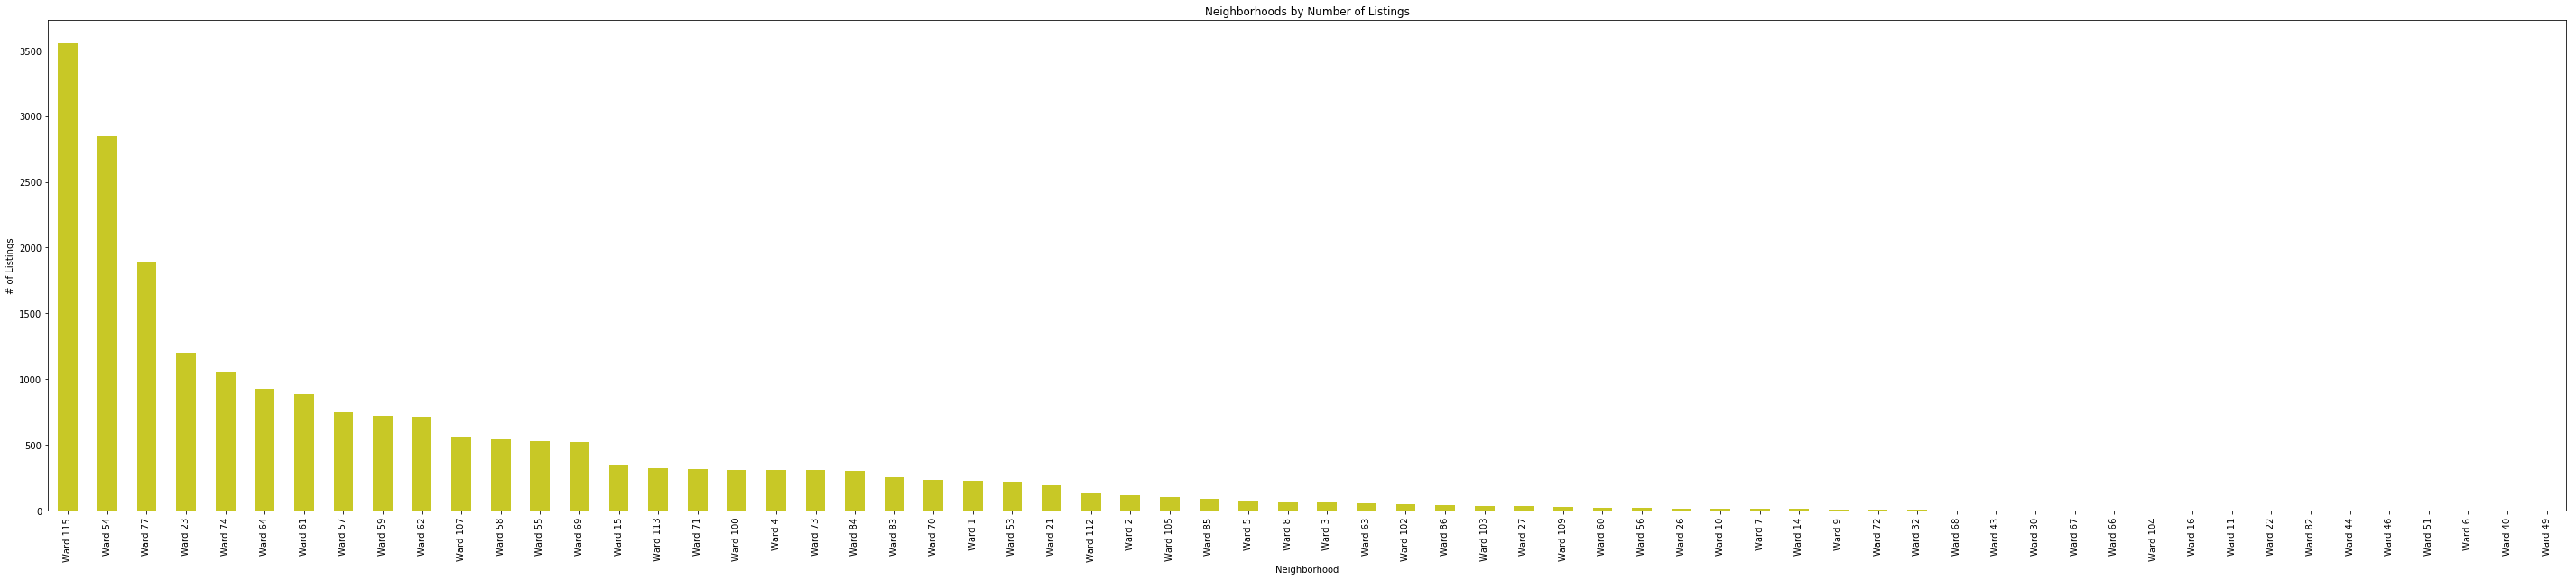

Number of Neighborhoods: 64


In [0]:
# Focus on neighbourhood_cleansed

# Get number of listings in neighborhoods
count_per_neighborhood = listings_zip_filtered['neighbourhood_cleansed'].value_counts()

# Plot number of listings in each neighborhood
ax = count_per_neighborhood.plot(kind='bar', figsize = (50,10), color = 'y', alpha = 0.85)
ax.set_title("Neighborhoods by Number of Listings")
ax.set_xlabel("Neighborhood")
ax.set_ylabel("# of Listings")
plt.show()

print("Number of Neighborhoods:", len(count_per_neighborhood))

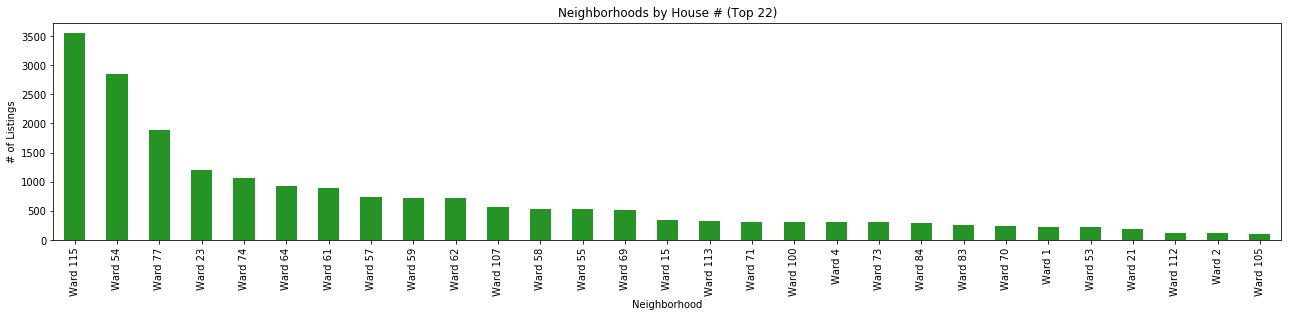

Number of entries removed:  681


In [0]:
relevant_neighborhoods = count_per_neighborhood[count_per_neighborhood > 100].index
listings_neighborhood_filtered = listings_zip_filtered[listings_zip_filtered['neighbourhood_cleansed'].isin(relevant_neighborhoods)]

# Plot new neighborhoods distribution
count_per_neighborhood = listings_neighborhood_filtered['neighbourhood_cleansed'].value_counts()
ax = count_per_neighborhood.plot(kind='bar', figsize = (22,4), color = 'g', alpha = 0.85)
ax.set_title("Neighborhoods by House # (Top 22)")
ax.set_xlabel("Neighborhood")
ax.set_ylabel("# of Listings")

plt.show()

print('Number of entries removed: ', listings_zip_filtered.shape[0] - listings_neighborhood_filtered.shape[0])

In [0]:
import numpy as np
from sklearn import preprocessing

# Function to label encode categorical variables.
# Input: array (array of values)
# Output: array (array of encoded values)
def encode_categorical(array):
    if not array.dtype == np.dtype('float64'):
        return preprocessing.LabelEncoder().fit_transform(array) 
    else:
        return array
    
# Temporary dataframe
temp_data = listings_neighborhood_filtered.copy()

# Delete additional entries with NaN values
temp_data = temp_data.dropna(axis=0)

# Encode categorical data
temp_data = temp_data.apply(encode_categorical)
# Compute matrix of correlation coefficients
corr_matrix = temp_data.corr()

corr_matrix

,host_total_listings_count,street,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
host_total_listings_count,1.000000,-0.006172,-0.067679,0.024578,0.065069,-0.053562,0.068020,-0.085401,0.035333,0.032688,0.025489,-0.000222,0.003957,-0.082132,0.029668,-0.071562,-0.037072,0.095533,-0.067235,0.029794,0.094758,0.096621,-0.026476,-0.001229,0.198823,0.028990,0.051270,0.055663,0.114992,NaN,NaN,0.103935,NaN,0.116206,-0.009718,-0.010906,0.751723,0.754118,0.041455,0.001075
street,-0.006172,1.000000,0.035120,-0.087401,-0.088795,0.137959,-0.016337,0.054104,-0.020820,-0.020503,-0.022885,-0.007230,0.005928,-0.005248,0.013643,0.001085,-0.026934,0.035709,-0.031548,-0.031836,0.034453,0.035131,-0.018236,-0.000773,0.039887,0.051477,0.049174,0.046229,0.053393,NaN,NaN,0.033899,NaN,0.051070,0.005493,0.001011,-0.023318,-0.041130,0.075955,-0.008160
neighbourhood_cleansed,-0.067679,0.035120,1.000000,0.094046,-0.473359,-0.127174,0.145249,-0.033492,0.097510,0.083183,0.111330,0.100150,-0.007115,0.018444,0.030598,0.010072,0.064266,-0.035643,0.067973,0.027711,-0.033268,-0.035267,0.021394,-0.013519,-0.081916,-0.036683,-0.050294,-0.052888,-0.056523,NaN,NaN,-0.085108,NaN,-0.009169,0.012131,0.006778,-0.113190,-0.101994,-0.058988,-0.044953
zipcode,0.024578,-0.087401,0.094046,1.000000,-0.106320,-0.670199,-0.081396,-0.100529,-0.009954,0.021340,-0.014261,-0.040286,0.001047,-0.036783,0.015341,-0.023030,0.029877,0.053321,0.029341,0.077735,0.051924,0.051675,0.020550,-0.007236,0.064512,-0.137717,-0.120535,-0.117081,-0.079977,NaN,NaN,-0.037503,NaN,0.144989,0.032348,0.029236,0.090694,0.099032,-0.034701,0.030690
latitude,0.065069,-0.088795,-0.473359,-0.106320,1.000000,-0.143485,-0.124891,0.040986,-0.106240,-0.078147,-0.090826,-0.113777,-0.004346,-0.003528,-0.045719,-0.022490,-0.004696,0.011348,-0.004583,0.002787,0.009979,0.011654,0.012893,0.006446,0.026167,-0.044495,-0.038662,-0.038027,-0.050656,NaN,NaN,0.021680,NaN,-0.014199,0.003696,0.011694,0.079906,0.070129,0.049899,0.022569
longitude,-0.053562,0.137959,-0.127174,-0.670199,-0.143485,1.000000,-0.001940,0.085969,-0.043487,-0.065619,-0.047505,-0.009079,0.001987,0.030513,-0.029654,0.019515,-0.045713,-0.037725,-0.046865,-0.076183,-0.036315,-0.037026,-0.024471,0.007269,-0.036300,0.123658,0.110147,0.106923,0.072922,NaN,NaN,0.050797,NaN,-0.139826,-0.017701,-0.011277,-0.098243,-0.104832,0.024445,-0.010174
property_type,0.068020,-0.016337,0.145249,-0.081396,-0.124891,-0.001940,1.000000,0.039898,0.347521,0.340308,0.344791,0.290598,0.002738,-0.006562,0.122293,0.016198,0.075841,-0.064025,0.078028,0.054015,-0.063521,-0.064578,0.009010,0.004815,-0.039114,0.012310,0.004036,0.005297,0.006179,NaN,NaN,-0.060950,NaN,0.032747,0.000653,0.000728,0.052252,0.050410,0.008737,0.007907
room_type,-0.085401,0.054104,-0.033492,-0.100529,0.040986,0.085969,0.039898,1.000000,-0.330361,-0.199877,-0.260687,-0.221195,-0.032413,0.086448,-0.116608,0.047518,-0.151615,-0.024782,-0.149502,-0.170487,-0.026902,-0.025916,-0.068845,0.012006,-0.032155,0.147435,0.127243,0.119733,0.088919,NaN,NaN,0.028538,NaN,-0.139443,-0.003305,0.007732,-0.077073,-0.207917,0.551239,0.254434
accommodates,0.035333,-0.020820,0.097510,-0.009954,-0.106240,-0.043487,0.347521,-0.330361,1.000000,0.787627,0.856381,0.810469,0.022297,-0.100979,0.295316,0.037307,0.183457,-0.037962,0.183567,0.198074,-0.036812,-0.037428,0.05

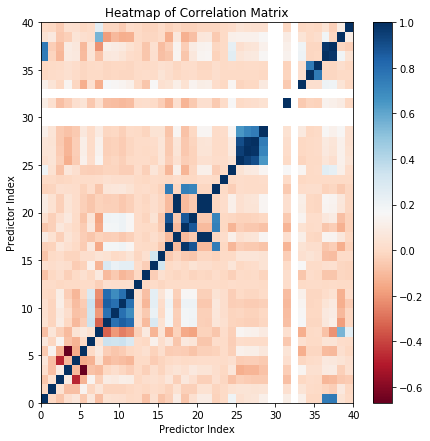

In [0]:
# Display heat map 
plt.figure(figsize=(7, 7))
plt.pcolor(corr_matrix, cmap='RdBu')
plt.xlabel('Predictor Index')
plt.ylabel('Predictor Index')
plt.title('Heatmap of Correlation Matrix')
plt.colorbar()

plt.show()

In [0]:
#Remove correlated
useless = ['calculated_host_listings_count', 'availability_30', 'availability_60', 'availability_90', 'requires_license']
listings_processed = listings_neighborhood_filtered.drop(useless, axis=1)

In [0]:
#price formatting: they contain the thousand separator (',') and the '$' symbols
listings_processed = listings_processed.copy()
listings_processed['price'] = listings_processed['price'].str.replace('\$|,', '')
listings_processed['price'] = pd.to_numeric(listings_processed['price'])

listings_processed['extra_people'] = listings_processed['extra_people'].str.replace('\$|,', '')
listings_processed['extra_people'] = pd.to_numeric(listings_processed['extra_people'])

In [0]:
listings_processed.head()

,host_total_listings_count,street,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_365,calendar_last_scraped,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,1.0,"Southern Suburbs, Western Cape, South Africa",Ward 57,770,-33.94739,18.47600,Guesthouse,Entire home/apt,2,1.0,1.0,1.0,Real Bed,657.0,2,0.0,3,730,3,3,730,730,3.0,730.0,today,324,2019-04-18,t,f,moderate,f,f,1,0,0
1,5.0,"Cape Town, Western Cape, South Africa",Ward 115,805,-33.90771,18.40535,Bed and breakfast,Private room,2,1.0,1.0,1.0,Real Bed,1301.0,2,0.0,3,30,1,3,30,30,1.1,30.0,today,0,2019-04-18,t,f,strict_14_with_grace_period,f,f,0,5,0
2,18.0,"Cape Town, Western Cape, South Africa",Ward 23,744,-33.80114,18.46180,House,Entire home/apt,6,3.0,3.0,4.0,Real Bed,2042.0,6,250.0,2,120,2,2,120,120,2.0,120.0,today,336,2019-04-18,f,f,strict_14_with_grace_period,f,f,4,0,0
3,15.0,"Cape Town, Western Cape, South Africa",Ward 23,744,-33.78799,18.46082,Apartment,Entire home/apt,6,2.0,3.0,5.0,Real Bed,2797.0,1,0.0,4,730,4,4,730,730,4.0,730.0,3 months ago,364,2019-04-18,f,f,strict_14_with_grace_period,f,f,13,0,0
4,5.0,"Cape Town, Western Cape, South Africa",Ward 4,744,-33.85878,18.48970,Bed and breakfast,Entire home/apt,2,1.0,1.0,2.0,Real Bed,1343.0,2,0.0,6,1125,6,6,1125,1125,6.0,1125.0,3 weeks ago,347,2019-04-18,f,f,strict_14_with_grace_period,f,f,4,1,0


In [0]:
# One Hot Encoding for categorical variables
listings_processedX = pd.get_dummies(listings_processed)
listings_processedX.shape

(20381, 562)

In [0]:
listings_processedX.columns

Index(['host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included',
       'extra_people',
       ...
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict',
       'cancellation_policy_strict_14_with_grace_period',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60',
       'require_guest_profile_picture_f', 'require_guest_profile_picture_t',
       'require_guest_phone_verification_f',
       'require_guest_phone_verification_t'],
      dtype='object', length=562)

In [0]:
#Trial and Errors Encoding
labelencoder_dict = {}
onehotencoder_dict = {}
X_train = None
for i in range(0, listings_processedX.shape[1]):
    label_encoder = LabelEncoder()
    labelencoder_dict[i] = label_encoder
    #feature = label_encoder.fit_transform(listings_processedX[:,i])
    #feature = feature.reshape(listings_processedX.shape[0], 1)
    onehot_encoder = OneHotEncoder(sparse=False)
    feature = onehot_encoder.fit_transform(feature)
    onehotencoder_dict[i] = onehot_encoder
    if X_train is None:
      X_train = feature
    else:
      X_train = np.concatenate((X_train, feature), axis=1)

In [0]:
def getEncoded(test_data,labelencoder_dict,onehotencoder_dict):
    test_encoded_x = None
    for i in range(0,test_data.shape[1]):
        label_encoder =  labelencoder_dict[i]
        feature = label_encoder.transform(test_data[:,i])
        feature = feature.reshape(test_data.shape[0], 1)
        onehot_encoder = onehotencoder_dict[i]
        feature = onehot_encoder.transform(feature)
        if test_encoded_x is None:
          test_encoded_x = feature
        else:
          test_encoded_x = np.concatenate((test_encoded_x, feature), axis=1)
  return test_encoded_x

IndentationError: ignored

In [0]:
#Trial One hot encoding 
from sklearn.preprocessing import OneHotEncoder
onehotencoder = pd.OneHotEncoder(listings_processed)
Xc = onehotencoder.fit_transform(listings_processed).toarray()

In [0]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit_transform(listings_processed).toarray()

ValueError: ignored

In [0]:
# Shuffle the data to ensure a good distribution for the training and testing sets
from sklearn.utils import shuffle
listings_processed = shuffle(listings_processed)

# Extract features and labels
y = listings_processed['price']
X = listings_processed.drop('price', axis = 1)

# Training and Testing Sets
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

train_X = np.array(train_X)
test_X = np.array(test_X)
train_y = np.array(train_y)
test_y = np.array(test_y)

train_X.shape, test_X.shape

((15537, 560), (5179, 560))

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

# Create the pipeline (imputer + scaler + regressor)
my_pipeline_RF = make_pipeline(Imputer(), StandardScaler(),
                               RandomForestRegressor(random_state=42))

# Fit the model
my_pipeline_RF.fit(train_X, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('imputer',
                 Imputer(axis=0, copy=True, missing_values='NaN',
                         strategy='mean', verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=10, n_jobs=None,
                                       oob_score=False, random_state=42,
                                       verbose=

In [0]:
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

def evaluate_model(model, predict_set, evaluate_set):
    predictions = model.predict(predict_set)
    print("Median Absolute Error: " + str(round(median_absolute_error(predictions, evaluate_set), 2))) 
    RMSE = round(sqrt(mean_squared_error(predictions, evaluate_set)), 2)
    print("RMSE: " + str(RMSE))                                                                               

In [0]:
evaluate_model(my_pipeline_RF, test_X, test_y)

Median Absolute Error: 345.8
RMSE: 2846.31


In [0]:
evaluate_model(my_pipeline_RF, train_X, train_y)

Median Absolute Error: 120.4
RMSE: 1861.43


In [0]:
importances = my_pipeline_RF.steps[2][1].feature_importances_
feature_importances = pd.DataFrame({"feature":X.columns.values, "importance":importances})
feature_importances.sort_values("importance", ascending=False).head(22)

,feature,importance
4,bathrooms,0.243747
1,latitude,0.052069
389,neighbourhood_cleansed_Ward 54,0.051887
3,accommodates,0.046476
8,extra_people,0.045729
433,property_type_Bungalow,0.045245
2,longitude,0.044689
17,availability_365,0.037164
5,bedrooms,0.033058
15,minimum_nights_avg_ntm,0.028517


In [0]:
# Cumulative importances
feature_importances.importance.sum()

1.0

**Application of the Gradient Boosting Regressor**


Let's try with the XGBoost gradient boosting model. This model often produces really good results in Kaggle competitions. The first step is to use it with the default hyperparameters.

With default hyperparameters

In [0]:
from xgboost import XGBRegressor

# Create the pipeline: Imputation + Scale + MLP regressor
my_pipeline_XGB = make_pipeline(Imputer(), StandardScaler(), 
                                XGBRegressor(random_state = 42))

# Fit the model
my_pipeline_XGB.fit(train_X, train_y)

evaluate_model(my_pipeline_XGB, test_X, test_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


[14:12:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Median Absolute Error: 442.31
RMSE: 2985.11


In [0]:
from joblib import dump
my_pipeline_RF= dump(my_pipeline_RF,'RF_Cape_Model.joblib')

In [0]:
import torch

model = torch.hub.load('pytorch/vision', 'resnet18', pretrained=True)

Downloading: "https://github.com/pytorch/vision/archive/master.zip" to /root/.cache/torch/hub/master.zip
Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:00<00:00, 86071187.15it/s]


In [0]:
listings_neighborhood_filtered['price'].head()

0      $657.00
1    $1,301.00
2    $2,042.00
3    $2,797.00
4    $1,343.00
Name: price, dtype: object

In [0]:
### Neighborhood Data
#listings_neighborhood_filtered['price']=float(listings_neighborhood_filtered['price'])
log_prices = np.log(listings_processed['price'])
neighborhoods = listings_processed['neighbourhood_cleansed']
unique_neighborhoods = pd.unique(neighborhoods)


neighborhood_counts = []
neighborhood_avprice = []

for i in unique_neighborhoods:
    neighborhood_counts.append(len(neighborhoods[neighborhoods==i]))
    neighborhood_avprice.append(np.mean(log_prices[neighborhoods==i]))

    
neighborhoods_df = pd.DataFrame({"neighborhood":unique_neighborhoods,
                                 "count":neighborhood_counts,
                                
                                "LogPrice":neighborhood_avprice})



neighborhoods_df.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


,neighborhood,count,LogPrice
0,Ward 57,746,6.529082
1,Ward 115,3551,-inf
2,Ward 23,1201,7.129039
3,Ward 4,311,-inf
4,Ward 83,255,6.894900
5,Ward 71,315,7.433958
6,Ward 112,128,6.820250
7,Ward 54,2850,-inf
8,Ward 59,721,7.097352
9,Ward 2,116,6.474591


In [0]:
min(listings_processed['price']),max(listings_processed['price']), np.median(listings_processed['price']),np.mean(listings_processed['price'])

(0.0, 230003.0, 1133.0, 2207.313576370149)

**TIME SERIES categories**

In [0]:
# Convert dates to datetime
dates = pd.to_datetime(new['date'].values)

# Add new datetime object
new['datetime'] = dates

# Groupby datetime, get average price difference
final = new.groupby(['datetime'], as_index = False)
final_sums = final['price_diff'].mean()

In [0]:
# Subset the data for easier viewing 

fall = final_sums[(final_sums['datetime'] > '2015-09-22') & (final_sums['datetime'] < '2015-12-22')] 
winter = final_sums[(final_sums['datetime'] > '2015-12-21') | (final_sums['datetime'] < '2015-03-20')] 
spring = final_sums[(final_sums['datetime'] > '2015-03-19') & (final_sums['datetime'] < '2015-06-21')] 
summer = final_sums[(final_sums['datetime'] > '2015-06-20') & (final_sums['datetime'] < '2015-09-23')]

# **Asset Types**

In [0]:
#property_type
df_last = pd.DataFrame(df.property_type.value_counts()).reset_index().rename(columns={'index':'property_type','property_type':'Listings'})

fig, (ax,ax1) = plt.subplots(1, 2, figsize=(15, 4))
df_last.plot(kind='bar', ax=ax)
ax.set_xticklabels(df_last['property_type'])
ax.set_xlabel('Property Type')
ax.set_ylabel('Count of Listings')
ax.set_title('Listings by Property Type')
Markdown('### Listings By Property / Room Type')

df_last = pd.DataFrame(df.room_type.value_counts()).reset_index().rename(columns={'index':'room_type','room_type':'Listings'})

df_last.plot(kind='bar', ax=ax1)
ax1.set_xticklabels(df_last['room_type'])
ax1.set_xlabel('Room Type')
ax1.set_ylabel('Listings by Room Type')
ax1.set_title('Listings by Room Type');
